In [26]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    'mssql+pyodbc://localhost/Project1?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
)
df = pd.read_sql('SELECT * FROM machine_prop', engine)
print(df.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [28]:
# Drop columns not needed for ML
df = df.drop(['UDI', 'Product ID' , 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

# Encode 'Type' as dummies
df = pd.get_dummies(df, columns=['Type'])

# Check for missing values
print(df.isnull().sum())
df = df.dropna()  # Or use imputation

# (Optional) Explore data, correlations, etc.


Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
Type_H                     0
Type_L                     0
Type_M                     0
dtype: int64


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(['Machine failure'], axis=1)
y = df['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.89      0.50      0.64        68

    accuracy                           0.98      2000
   macro avg       0.94      0.75      0.82      2000
weighted avg       0.98      0.98      0.98      2000

[[1928    4]
 [  34   34]]


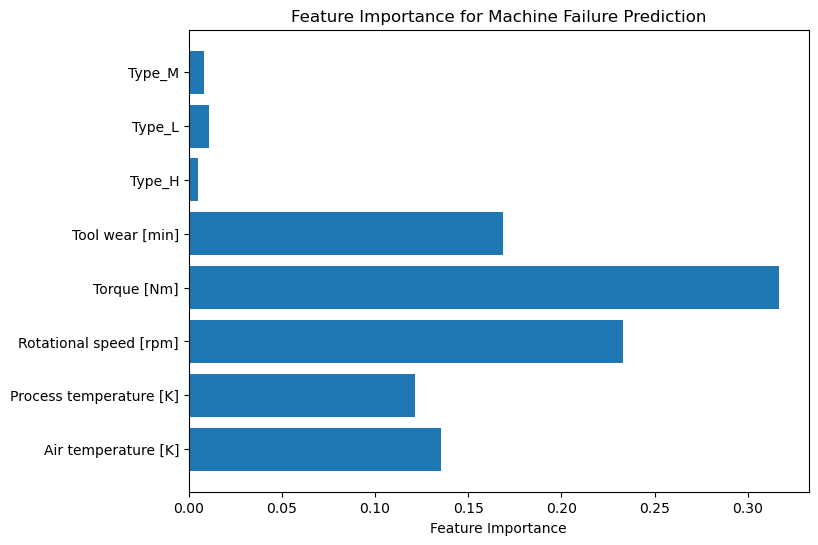

In [34]:

import matplotlib.pyplot as plt

feature_names = X_train.columns
importances = clf.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Machine Failure Prediction")
plt.show()
